# Pratique: Exploration de modele 

In [1]:
#utilisation d'un rapport de sortie
report = open('report.txt', 'w')
#print('resultat intermediaire', file=report)

* chargement du dataset

In [2]:
import pandas as pd # conventional alias
from sklearn.datasets import load_boston

dataset = load_boston()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

* Decsription du dataset

In [4]:
#shape
df.shape

(506, 14)

In [12]:
# caracteristiques
print "data"
print df[1:10]
print "target"
df.target[1:10,]

data
      CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   

   PTRATIO       B  LSTAT  target  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  
5     18.7  394.12   5.21    28.7  
6     15.2  395.60  12.43    22.9  
7 

1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: target, dtype: float64

In [11]:
# Distributions des attributs
# function df.describe() , df.count(), df.min(), df.max(), df.median(), df.quantile(q)

In [13]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


* Determiner les valeurs manquante

In [16]:
# Valeurs manquantes
# utiliser pd.isnull(df).any() et pd.isnull(df).sum()
pd.isnull(df).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
target     False
dtype: bool

# Correlations entre attributs

* But: on essaye d'obtenir un ensemble de features independent les uns des autres
* Dans le cas où l'on trouve de la dependance, on utiliser par exemple PCA-dimension reduction

## Dans le module Panda, on dispose de
* Coefficients de correlation Pearson
* Spearman rank correlation
* Kendall Tau coeeficient

## Interprétation
* valeur de 1: correlation totale
* valeur -1: correlation négative
* valeur 0: pas de correlation

In [15]:
df.corr(method='pearson')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [16]:
df.corr(method='kendall')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.461987,0.521177,0.034602,0.602035,-0.213002,0.496920,-0.539252,0.562966,0.544007,0.312570,-0.262379,0.453083,-0.402033
ZN,-0.461987,1.000000,-0.535468,-0.039419,-0.511464,0.278134,-0.429389,0.478524,-0.234663,-0.289911,-0.361607,0.128177,-0.386818,0.339989
INDUS,0.521177,-0.535468,1.000000,0.075889,0.612030,-0.291318,0.489070,-0.565137,0.353967,0.483228,0.336612,-0.192017,0.465980,-0.418430
CHAS,0.034602,-0.039419,0.075889,1.000000,0.056387,0.048080,0.055616,-0.065619,0.021739,-0.037655,-0.115694,-0.033277,-0.041344,0.115202
NOX,0.602035,-0.511464,0.612030,0.056387,1.000000,-0.215633,0.589608,-0.683930,0.434828,0.453258,0.278678,-0.202430,0.452005,-0.394995
RM,-0.213002,0.278134,-0.291318,0.048080,-0.215633,1.000000,-0.187611,0.179801,-0.076569,-0.190532,-0.223194,0.032951,-0.468231,0.482829
AGE,0.496920,-0.429389,0.489070,0.055616,0.589608,-0.187611,1.000000,-0.609836,0.306201,0.360311,0.251857,-0.154056,0.485359,-0.387758
DIS,-0.539252,0.478524,-0.565137,-0.065619,-0.683930,0.179801,-0.609836,1.000000,-0.361892,-0.381988,-0.223486,0.168631,-0.409347,0.313115
RAD,0.562966,-0.234663,0.353967,0.021739,0.434828,-0.076569,0.306201,-0.361892,1.000000,0.558107,0.251913,-0.214364,0.287943,-0.248115
TAX,0.544007,-0.289911,0.483228,-0.037655,0.453258,-0.190532,0.360311,-0.381988,0.558107,1.000000,0.287769,-0.241606,0.384191,-0.414650


In [17]:
df.corr(method='spearman')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.571586,0.735409,0.042337,0.820355,-0.310738,0.703673,-0.744381,0.726496,0.728157,0.464386,-0.358463,0.632969,-0.557032
ZN,-0.571586,1.000000,-0.642811,-0.041937,-0.634828,0.361074,-0.544423,0.614627,-0.278767,-0.371394,-0.448475,0.163135,-0.490074,0.438179
INDUS,0.735409,-0.642811,1.000000,0.089841,0.791189,-0.415301,0.679487,-0.757080,0.455507,0.664361,0.433710,-0.285840,0.638747,-0.578255
CHAS,0.042337,-0.041937,0.089841,1.000000,0.068426,0.058813,0.067792,-0.080248,0.024579,-0.044486,-0.136065,-0.039810,-0.050575,0.140612
NOX,0.820355,-0.634828,0.791189,0.068426,1.000000,-0.310344,0.795153,-0.880015,0.586429,0.649527,0.391309,-0.296662,0.636828,-0.562609
RM,-0.310738,0.361074,-0.415301,0.058813,-0.310344,1.000000,-0.278082,0.263168,-0.107492,-0.271898,-0.312923,0.053660,-0.640832,0.633576
AGE,0.703673,-0.544423,0.679487,0.067792,0.795153,-0.278082,1.000000,-0.801610,0.417983,0.526366,0.355384,-0.228022,0.657071,-0.547562
DIS,-0.744381,0.614627,-0.757080,-0.080248,-0.880015,0.263168,-0.801610,1.000000,-0.495806,-0.574336,-0.322041,0.249595,-0.564262,0.445857
RAD,0.726496,-0.278767,0.455507,0.024579,0.586429,-0.107492,0.417983,-0.495806,1.000000,0.704876,0.318330,-0.282533,0.394322,-0.346776
TAX,0.728157,-0.371394,0.664361,-0.044486,0.649527,-0.271898,0.526366,-0.574336,0.704876,1.000000,0.453345,-0.329843,0.534423,-0.562411


* Effectuer un tri sur les paires de correlation

In [24]:
pearson = df.corr(method='pearson')
attrs = pearson.iloc[:-1,:-1] # all except target
# only important correlations and not auto-correlations
threshold = 0.5
# {('LSTAT', 'TAX'): 0.543993, ('INDUS', 'RAD'): 0.595129, ...
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
    .unstack().dropna().to_dict()
#     attribute pair  correlation
# 0     (AGE, INDUS)     0.644779
# 1     (INDUS, RAD)     0.595129
# ...
unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])
# sorted by absolute value
unique_important_corrs = unique_important_corrs.ix[
    abs(unique_important_corrs['correlation']).argsort()[::-1]]
print "Paires de correlation"
unique_important_corrs

Paires de correlation


,attribute pair,correlation
8,"(RAD, TAX)",0.910228
4,"(DIS, NOX)",-0.769230
16,"(INDUS, NOX)",0.763651
3,"(AGE, DIS)",-0.747881
1,"(AGE, NOX)",0.731470
5,"(INDUS, TAX)",0.720760
15,"(DIS, INDUS)",-0.708027
14,"(NOX, TAX)",0.668023
21,"(DIS, ZN)",0.664408
12,"(AGE, INDUS)",0.644779


## Remarque
* Difference entre les 3 méthodes: complexité des calculs
* Utiliser la fonction timeit() sur chacune 

# Qualité de Prediction des attributs

* On utilise la mesure de prédictivité entre un attribut et la cible. C'est la correlation entre le predicteur en entrée et la cible

In [21]:
pearson = df.corr(method='pearson')
# assume target attr is the last, then remove corr with itself
corr_with_target = pearson.ix[-1][:-1]
# attributes sorted from the most predictive
predictivity = corr_with_target.sort_values(ascending=False)
predictivity

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: target, dtype: float64

* Tri en tenant compte des correlations negatives


In [22]:
corr_with_target[abs(corr_with_target).argsort()[::-1]]

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64

* Avec les mesures de correlation précédentes entre les attributs prédicteurs et les mesures de prédictivité, on peut lancer quelques visualisation

* Correlation entre attributs

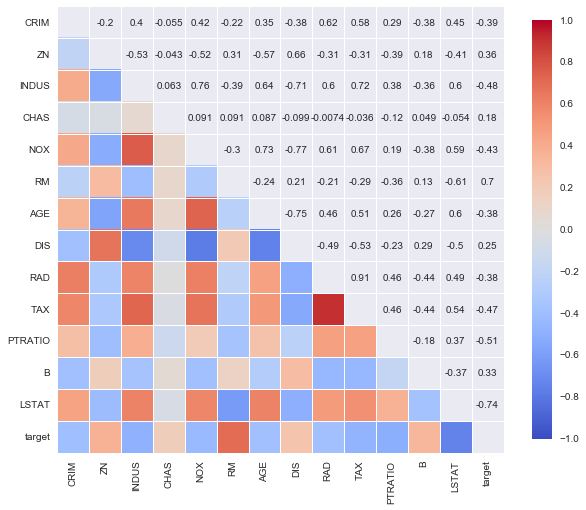

In [37]:
# utilisation de seaborn
# a installer en premier en utilisant Anaconda prompt
# To install this package with conda run:
#conda install -c anaconda seaborn=0.7.0
# voir https://anaconda.org/anaconda/seaborn
import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline
#sns.corrplot(df) # compute and plot the pair-wise correlations
# save to file, remove the big white borders
#plt.savefig('attribute_correlations.png', tight_layout=True)#
# make a plot of specified dimension (in inches), just a 1x1 subplot
fig, ax = plt.subplots(figsize=(10, 10))
# pass the axis to draw on
#sns.corrplot(df, ax=ax)
sns.corrplot(df, annot=True, sig_stars=False, diag_names=False)

* Remarque: on est intéressé par les couleurs foncées qui indiquent une forte correlation

##  Distribution (pdf) de chacun des attributs (voir projet intégrateur)

(array([ 440.,   43.,   14.,    1.,    3.,    2.,    0.,    1.,    1.,    1.]),
 array([  6.32000000e-03,   8.90330800e+00,   1.78002960e+01,
          2.66972840e+01,   3.55942720e+01,   4.44912600e+01,
          5.33882480e+01,   6.22852360e+01,   7.11822240e+01,
          8.00792120e+01,   8.89762000e+01]),
 <a list of 10 Patch objects>)

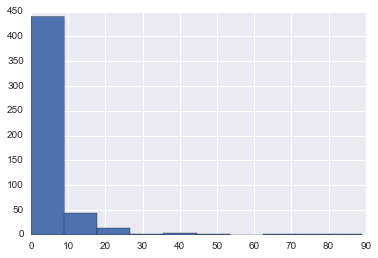

In [39]:
#import matplotlib.pyplot as plt
attr = df['CRIM']
plt.hist(attr)

* utilisation de seaborn. Overlay de l'histogramme et du KDE

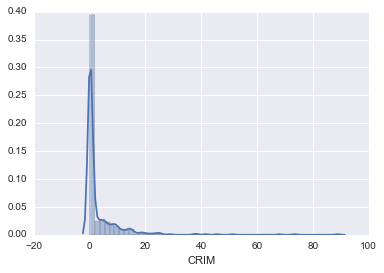

In [41]:
sns.distplot(attr)

* Remarque: on devrait effectuer la meme opération pour les autres variables et ensuite évaluer la présence de valeurs extremes (outliers)
    * Ensuite prévoir une réduction d'impact